# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as owm
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from api_keys import weather_api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": weather_api_key}

# Initialize data frame to store data from API calls
#WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
#                                    "Date", "Max Temp", "Wind Speed", 
#                                    "Lat","Lng", "Humidity"])

In [4]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
City=[]
Cloudiness=[]
Country=[]
Date=[]
MaxTemp=[]
WindSpeed=[]
Lat=[]
Lng=[]
Humidity=[]
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n -------------------------------------------------')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        #print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={weather_api_key}')
        city_stats = owm.get_current(city, **settings)
        City.append(city_stats["name"])
        Cloudiness.append(city_stats("clouds.all"))
        Country.append(city_stats("sys.country"))
        Date.append(city_stats("dt"))
        MaxTemp.append(city_stats("main.temp_max"))
        WindSpeed.append(city_stats("wind.speed"))
        Lat.append(city_stats("coord.lat"))
        Lng.append(city_stats("coord.lon"))
        Humidity.append(city_stats("main.humidity"))
               
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("End of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 -------------------------------------------------
Processing Record 1 of Set 0 | kundiawa
Processing Record 2 of Set 0 | leningradskiy
Processing Record 3 of Set 0 | mys shmidta
HTTP Error 404: Not Found
Processing Record 4 of Set 0 | albany
Processing Record 5 of Set 0 | hilo
Processing Record 6 of Set 0 | new norfolk
Processing Record 7 of Set 0 | sechura
Processing Record 8 of Set 0 | kaspiyskiy
Processing Record 9 of Set 0 | mataura
Processing Record 10 of Set 0 | mahebourg
Processing Record 11 of Set 0 | pacific grove
Processing Record 12 of Set 0 | tuatapere
Processing Record 13 of Set 0 | ponta do sol
Processing Record 14 of Set 0 | batemans bay
Processing Record 15 of Set 0 | bambous virieux
Processing Record 16 of Set 0 | atuona
Processing Record 17 of Set 0 | pevek
Processing Record 18 of Set 0 | barentsburg
HTTP Error 404: Not Found
Processing Record 19 of Set 0 | isla mujeres
Processing Record 20 of Set 0 | rikitea
Processing Record 21 of Set 0 | 

Processing Record 36 of Set 3 | lira
Processing Record 37 of Set 3 | bilma
Processing Record 38 of Set 3 | vila velha
Processing Record 39 of Set 3 | la ronge
Processing Record 40 of Set 3 | atar
Processing Record 41 of Set 3 | bataipora
Processing Record 42 of Set 3 | bethel
Processing Record 43 of Set 3 | iqaluit
Processing Record 44 of Set 3 | davila
Processing Record 45 of Set 3 | saint-augustin
Processing Record 46 of Set 3 | tottori
Processing Record 47 of Set 3 | price
Processing Record 48 of Set 3 | grand river south east
HTTP Error 404: Not Found
Processing Record 49 of Set 3 | batamshinskiy
Processing Record 50 of Set 3 | moose factory
Processing Record 1 of Set 4 | thunder bay
Processing Record 2 of Set 4 | dikson
Processing Record 3 of Set 4 | rungata
HTTP Error 404: Not Found
Processing Record 4 of Set 4 | casablanca
Processing Record 5 of Set 4 | luderitz
Processing Record 6 of Set 4 | fortuna
Processing Record 7 of Set 4 | tairua
Processing Record 8 of Set 4 | les escoum

Processing Record 22 of Set 7 | luganville
Processing Record 23 of Set 7 | lerwick
Processing Record 24 of Set 7 | puruliya
Processing Record 25 of Set 7 | kamenka
Processing Record 26 of Set 7 | mackay
Processing Record 27 of Set 7 | suzu
HTTP Error 404: Not Found
Processing Record 28 of Set 7 | ondjiva
Processing Record 29 of Set 7 | manokwari
Processing Record 30 of Set 7 | conceicao da barra
Processing Record 31 of Set 7 | mount isa
Processing Record 32 of Set 7 | zaplavnoye
Processing Record 33 of Set 7 | buraydah
Processing Record 34 of Set 7 | maniitsoq
Processing Record 35 of Set 7 | san jose del palmar
Processing Record 36 of Set 7 | sistranda
Processing Record 37 of Set 7 | mimongo
Processing Record 38 of Set 7 | cozumel
Processing Record 39 of Set 7 | kourou
Processing Record 40 of Set 7 | farmington
Processing Record 41 of Set 7 | muravlenko
Processing Record 42 of Set 7 | quatre cocos
Processing Record 43 of Set 7 | lakes entrance
Processing Record 44 of Set 7 | ipixuna
Pr

Processing Record 16 of Set 11 | avdiyivka
HTTP Error 404: Not Found
Processing Record 17 of Set 11 | sioux lookout
Processing Record 18 of Set 11 | dingli
Processing Record 19 of Set 11 | camacha
Processing Record 20 of Set 11 | santa fe
Processing Record 21 of Set 11 | jacareacanga
Processing Record 22 of Set 11 | njombe
Processing Record 23 of Set 11 | barbar
HTTP Error 404: Not Found
Processing Record 24 of Set 11 | cody
Processing Record 25 of Set 11 | jining
Processing Record 26 of Set 11 | diamantino
Processing Record 27 of Set 11 | veraval
Processing Record 28 of Set 11 | macklin
Processing Record 29 of Set 11 | vila do maio
Processing Record 30 of Set 11 | tocopilla
Processing Record 31 of Set 11 | osmena
Processing Record 32 of Set 11 | altay
Processing Record 33 of Set 11 | kaeo
Processing Record 34 of Set 11 | kattivakkam
Processing Record 35 of Set 11 | ouango
Processing Record 36 of Set 11 | broome
Processing Record 37 of Set 11 | byron bay
Processing Record 38 of Set 11 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
WeatherPy_df ={"City":City,"Cloudiness":Cloudiness, "Country":Country,
                                   "Date":Date, "Max Temp":MaxTemp, "Wind Speed":WindSpeed, 
                                    "Lat":Lat,"Lng":Lng, "Humidity":Humidity}
WeatherPy_df=pd.DataFrame(WeatherPy_df)
WeatherPy_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Max Temp      570
Wind Speed    570
Lat           570
Lng           570
Humidity      570
dtype: int64

In [6]:
WeatherPy_df

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Kundiawa,100,PG,1590157798,62.38,2.62,-6.02,144.97,78
1,Leningradskiy,0,RU,1590157798,21.87,3.33,69.38,178.42,95
2,Albany,0,US,1590157752,71.01,3.02,42.60,-73.97,56
3,Hilo,90,US,1590157724,71.60,8.05,19.73,-155.09,83
4,New Norfolk,0,AU,1590157799,39.00,2.55,-42.78,147.06,79
...,...,...,...,...,...,...,...,...,...
565,Punta Alta,0,AR,1590158306,53.65,6.89,-38.88,-62.07,58
566,Taoudenni,0,ML,1590158519,104.38,17.29,22.68,-3.98,7
567,Porto Santo,75,PT,1590158519,69.80,14.99,33.07,-16.34,73
568,Staveley,58,GB,1590158519,64.99,3.00,53.27,-1.35,46


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
WeatherPy_df.describe()


,Cloudiness,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
count,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000
mean,51.901754,1.590158e+09,67.408281,8.714228,18.993193,15.979158,65.715789
std,38.413770,2.275729e+02,18.165874,5.729801,33.455535,90.341841,22.610399
min,0.000000,1.590158e+09,20.640000,0.450000,-54.800000,-175.200000,1.000000
25%,13.000000,1.590158e+09,54.215000,4.372500,-8.420000,-64.615000,54.000000
50%,52.000000,1.590158e+09,69.485000,7.355000,21.255000,18.195000,70.000000
75%,90.000000,1.590158e+09,81.815000,11.410000,47.325000,92.605000,83.000000
max,100.000000,1.590159e+09,109.720000,39.150000,78.220000,179.320000,100.000000


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
WeatherPy_df.to_csv('City Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

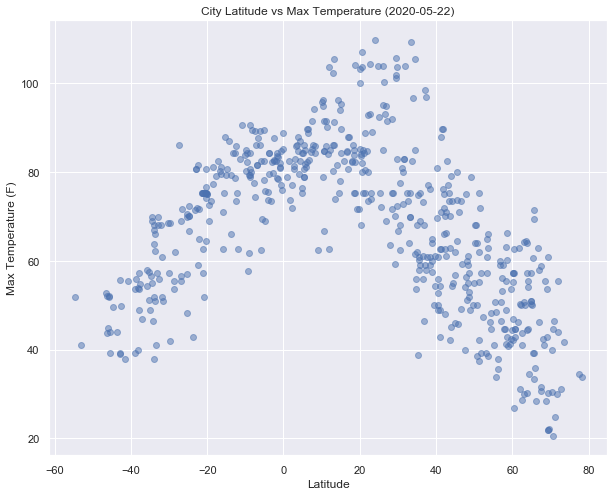

In [35]:
import seaborn as sns
from datetime import datetime
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig(f"../output_data/City Latitude vs Max Temperature ({datetime.now().date()}).png")
plt.show()

## Latitude vs. Humidity Plot

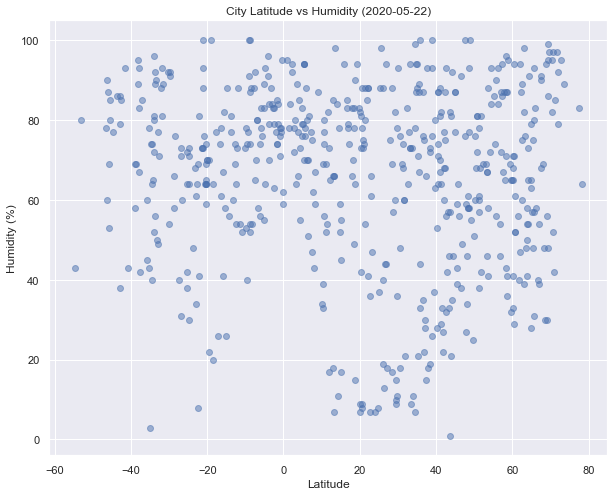

In [34]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig(f"../output_data/City Latitude vs Humidity ({datetime.now().date()}).png")

plt.show()

## Latitude vs. Cloudiness Plot

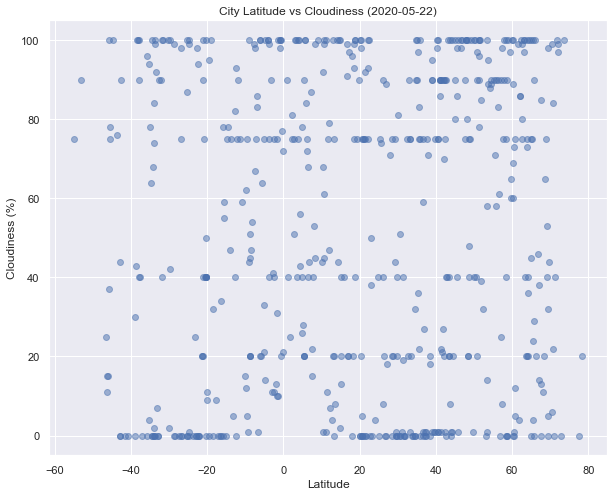

In [33]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig(f"../output_data/City Latitude vs Cloudiness ({datetime.now().date()}).png")
plt.show()

## Latitude vs. Wind Speed Plot

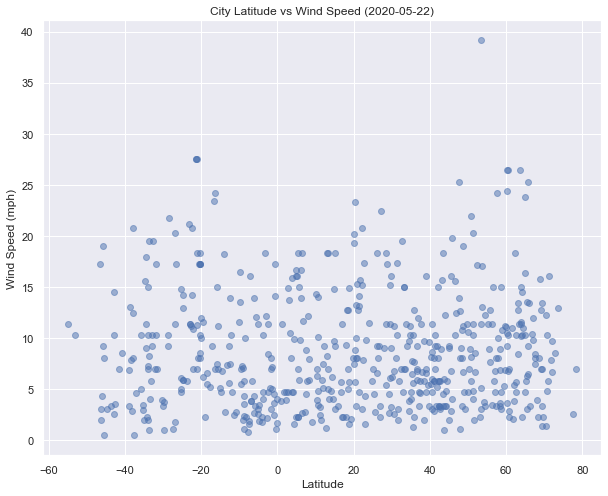

In [32]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig(f"../output_data/City Latitude vs Wind Speed ({datetime.now().date()}).png")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def scatt(x,y,xtext,ytext):
    # --------------------------------------------------------------------------
    # \ xtext and ytext are the cordenates for the linear regression ecuation. \
    # --------------------------------------------------------------------------
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color='k', alpha=0.8)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(xtext,ytext),fontsize=15,color="red")
    
    plt.xlabel('Latitude')
    print('Name your y axis')
    y_ax=input()
    plt.ylabel(f'{y_ax}')
    print('Name your graph')
    titl=input()
    plt.title(f'{titl}')
    plt.savefig(f"../output_data/{titl}.png")
    plt.show()


    results = {} 
    
    coeffs = np.polyfit(x, y,1) 
    # Polynomial Coefficients 
    results['polynomial'] = coeffs.tolist() 

    correlation = np.corrcoef(x, y)[0,1] 

    # r-squared 
    r_squared = correlation**2 

    return print(f'The r-squared is: {r_squared}')

In [22]:
# Create Northern and Southern Hemisphere DataFrames
Northern=WeatherPy_df[WeatherPy_df["Lat"]>=0]
Southern=WeatherPy_df[WeatherPy_df["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Name your y axis
Max Temp (F)
Name your graph
Northern Hemisphere - Max Temp vs. Latitude


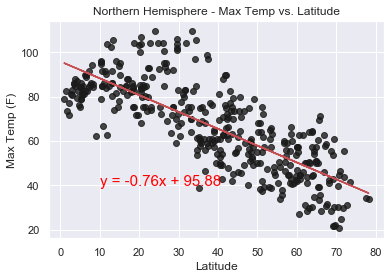

The r-squared is: 0.6073074233496765


In [23]:
scatt(Northern['Lat'],Northern['Max Temp'],10,40)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Name your y axis
Max Temp (F)
Name your graph
Southern Hemisphere - Max Temp vs. Latitude


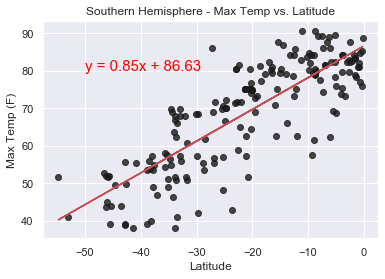

The r-squared is: 0.6722409954208104


In [24]:
scatt(Southern['Lat'],Southern['Max Temp'],-50,80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Name your y axis
Humidity (%)
Name your graph
Northern Hemisphere - Humidity (%) vs. Latitude


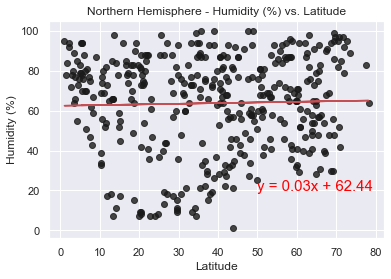

The r-squared is: 0.0007829738284630712


In [25]:
scatt(Northern['Lat'],Northern['Humidity'],50,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Name your y axis
 Humidity (%)
Name your graph
Southern Hemisphere - Humidity (%) vs. Latitude


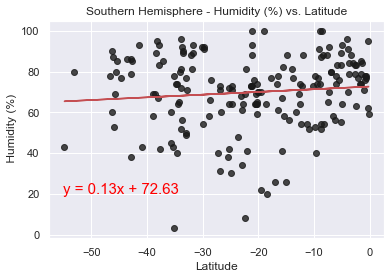

The r-squared is: 0.010016456647244447


In [26]:
scatt(Southern['Lat'],Southern['Humidity'],-55,20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Name your y axis
Cloudiness (%)
Name your graph
Northern Hemisphere - Cloudiness (%) vs. Latitude


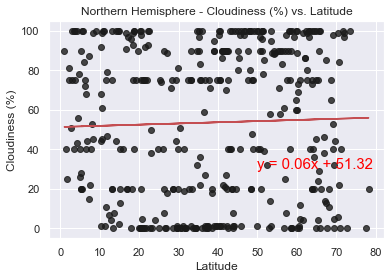

The r-squared is: 0.0009942621398909533


In [27]:
scatt(Northern['Lat'],Northern['Cloudiness'],50,30)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Name your y axis
Cloudiness (%)
Name your graph
Southern Hemisphere - Cloudiness (%) vs. Latitude


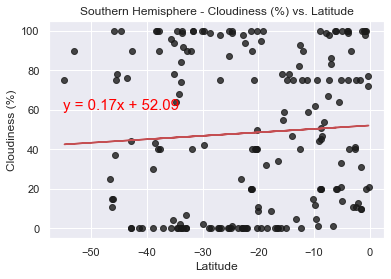

The r-squared is: 0.003854244118750062


In [28]:
scatt(Southern['Lat'],Southern['Cloudiness'],-55,60)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Name your y axis
Wind Speed (mph)
Name your graph
Northern Hemisphere - Wind Speed (mph) vs. Latitude


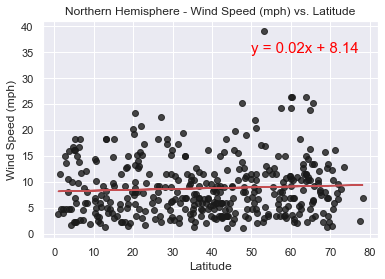

The r-squared is: 0.0033134810240865007


In [30]:
scatt(Northern['Lat'],Northern['Wind Speed'],50,35)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Name your y axis
Wind Speed (mph)
Name your graph
Southern Hemisphere - Wind Speed (mph) vs. Latitude


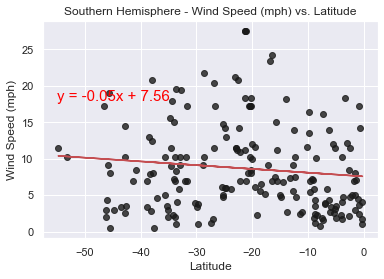

The r-squared is: 0.01364663152597018


In [31]:
scatt(Southern['Lat'],Southern['Wind Speed'],-55,18)